# 🏠 Airbnb Listings EDA & Data Visualization - New York 2024

## 📌 Project Overview
This project analyzes Airbnb listings in New York to uncover pricing trends, host behavior, and property insights.

## 🔍 Key Objectives:
- Understand pricing distribution across different boroughs.
- Identify factors affecting Airbnb pricing.
- Explore host activity and property availability.
- Use visualizations to communicate findings effectively.

## 📊 Dataset Information:
- Source: Airbnb Open Data 2024
- Contains details about Airbnb listings: price, neighborhood, number of reviews, availability, etc.

---


#### Steps
1. Importing All dependencies (lib)
2. loading datasets
3. initial exploration
4. Data cleaning
5. Data Analysis

#### TASK 1. Import All Dependencies

In [ ]:
# Run all these in Terminal 

# first install pandas
# > pip install pandas

# now also install numpy
# > pip install numpy

# similary install matplotlib and seaborn
# > pip install matplotlib
# > pip install seaborn

#  now we can verify the packages by 
# > pip list

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### TASK 2. Loading the Dataset

In [2]:
data = pd.read_csv('datasets.csv',encoding_errors='ignore')


#### Task 3: Initial Exploration

In [3]:
data.head()
data.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
7522,27429253.0,Home in Queens · ★4.0 · 1 bedroom · 1 bed · 1 ...,200239515,Shogo,Queens,Woodside,40.74121,-73.89288,Private room,34.0,...,21/08/19,0.07,249.0,54.0,0.0,No License,4,1,1,1


In [4]:
data.shape

(20770, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

#### Task 4:Data Cleaning & Preprocessing
- Check missing values and duplicates.
- Convert data types where needed.
- Remove outliers (like extreme Airbnb prices).

***✅ Code to Check Missing Values***

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
dtype: int64

***✅ Remove Duplicates***

In [7]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

***✅ Handle Missing Values***
- Drop missing values if necessary.
- Fill missing values with median or mode.


In [8]:
# now to handle null values , 
# we have to methods either to fill or either to remove rows which have null values 

# let remove that rows have null values 
data.dropna(inplace=True)   # this will drop rows have null values 


# Fill missing values with median (for numerical columns)
# data.fillna(data.median(), inplace=True)




In [9]:
# now again check
# data.info()
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [10]:
# as count rows now 
data.shape

(20724, 22)

In [11]:
# now duplicates with the null values 

data.duplicated().sum()

np.int64(0)

In [12]:
# see that duplicates
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


In [13]:
# so we have done the data cleaning 
#  now lets check data constraints , as data coloumn have correct data type or not 

# so lets check data type 
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [14]:
# as we see all dtype are correct 
# but if not some correct than we can change that , let assume one coloumn id is not correct
# so how to do that , lets see

# data['id'].astype(object)
# we have to actually change in data , so we can do  
# data['id'] = data['id'].astype(object)


# this is called typecasting.

In [15]:
# lets again check
# data.dtypes

# see changed id changes to dtypes.

# lets again check to correct ,
# data['id'] = data['id'].astype('Int64')

### Exploratory Data Analysis (EDA)
***Task 5 : Data Analysis***
- Add more meaningful insights and visualizations.


##### ✅ 1. Summary Statistics

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.072400e+04,2.072400e+04,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000
mean,3.037299e+17,1.749996e+08,40.726843,-73.939155,187.732195,28.566396,42.592646,1.257529,18.840041,205.940938,10.844480,1.723412
std,3.902175e+17,1.725778e+08,0.060320,0.061442,1023.539393,33.560272,73.534712,1.905221,70.944874,135.101383,21.359681,1.211237
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.710766e+07,2.043733e+07,40.684150,-73.980760,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.994511e+07,1.089827e+08,40.722937,-73.949599,125.000000,30.000000,14.000000,0.650000,2.000000,214.000000,3.000000,1.000000
75%,7.220000e+17,3.144602e+08,40.763132,-73.917430,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


##### ✅ 2. Correlation Heatmap

<Axes: >

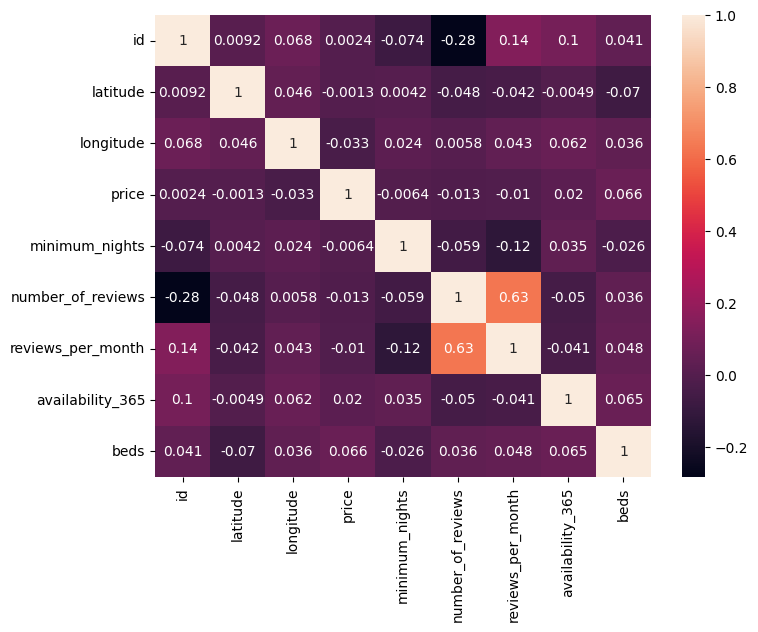

In [17]:
# heat map - correlation of one variable with others for numerical coloumn
corr = data[['id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
corr
plt.figure(figsize=(8,6))
sns.heatmap(data=corr,annot=True)

##### Univariate Analysis
Univariate Analysis : its a analysing each of single coloumn and their data distribution

<Axes: xlabel='price'>

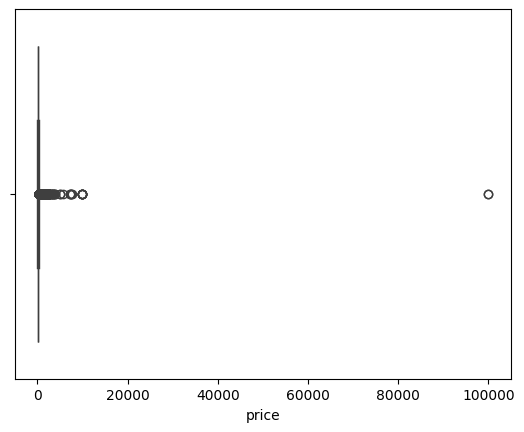

In [18]:
# identifying outliers in price
# for that we use boxplot
sns.boxplot(data=data,x='price')

so we can seen that above graph some price is between o to some less than 20000
only few price is at 100000 , so this is causing the issue
-- so we have to deal with this outlier , 
either by remove that rows , 

In [19]:
# so for handle outlier what we can do is 
# lets extract data which is less than 1500 

df = data[data['price'] < 1500]


<Axes: xlabel='price'>

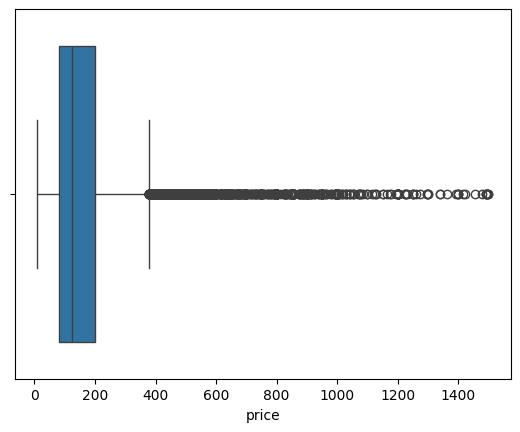

In [20]:
# now again check for outliers 
sns.boxplot(data=df,x='price')


see here now above graph , the price lying between 0 to 1500 so there is no 
outliers , as clearly seen in data there is uniform distribution.

In [21]:
# lets first analyse 
# price distribution
data['price']

# the min max avg std , all we already seen with describe function 

0         55.0
1        144.0
2        187.0
3        120.0
4         85.0
         ...  
20765     45.0
20766    105.0
20767    299.0
20768    115.0
20769    102.0
Name: price, Length: 20724, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

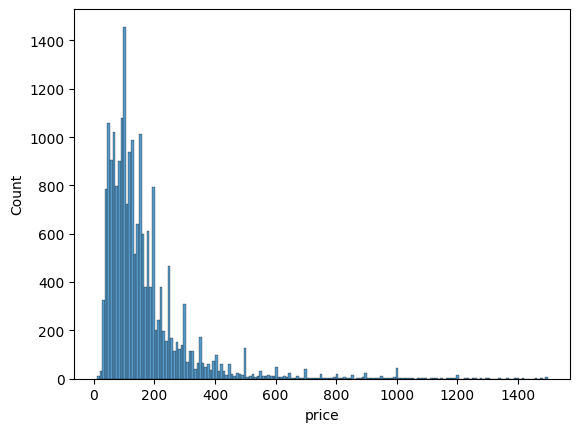

In [22]:
# now lets create its histograph
sns.histplot(data = df,x='price')

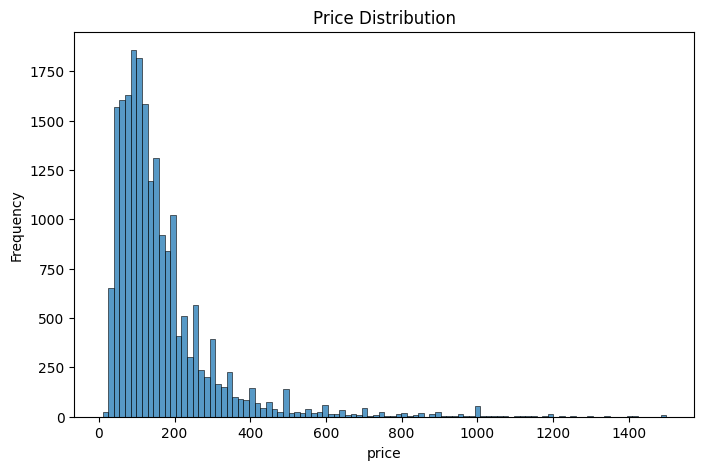

In [23]:
# lets change it size and give name for y label as frequency 
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='price',bins=100)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.show()

as we analyse 'price' coloumn , now lets see some more coloumn

In [24]:
# df.columns
df.dtypes

# we can analyse numbers coloumns , as histogram can only creates of numeric values

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

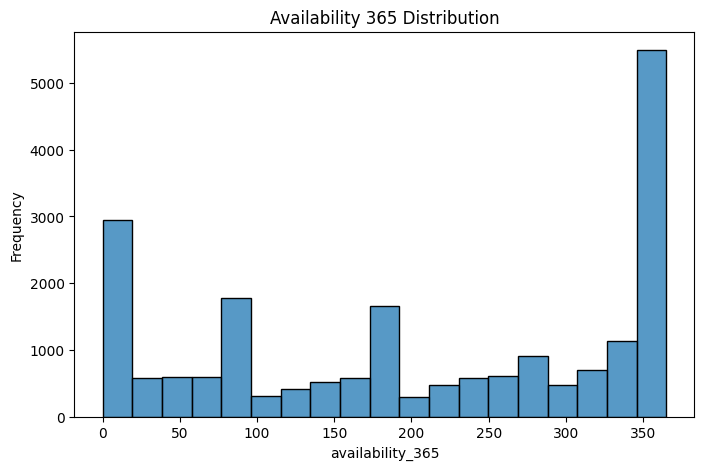

In [25]:
# now lets do for 'availability_365' as it showing days time , of avaibility,
# do same as of do with price

plt.figure(figsize=(8,5))
sns.histplot(data=df,x='availability_365')
plt.title("Availability 365 Distribution")
plt.ylabel("Frequency")
plt.show()

now lets do some more analysis , first check again dtypes, 

In [26]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

So lets now check average price for each neighbourhood_group , 
for that we have to group by neighbourhood_group with the price  
lets do .

In [27]:
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

now lets do feature engineering , 
**Feature Engineering**
lets first see some data , before to understand

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [32]:
# so what we do is , add a coloumn which price for each bed 
# ['price_per_bed']

df['price_per_bed'] = df['price']/df['beds']
df.head()

C:\Users\RAVI YADAV\AppData\Local\Temp\ipykernel_9152\1130558083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_bed'] = df['price']/df['beds']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_per_bed
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


In [33]:
# lets find average price group by neighbourhood_group and price per bed and see the difference , with price , 
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price_per_bed, dtype: float64

see the difference among price and price per bed with group by neighbourhood_group

**Bi Variable Analysis**
this is same as of Univariate Analysis , here we do one coloumn relationship with the another coloumn 

lets check all coloumns 

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

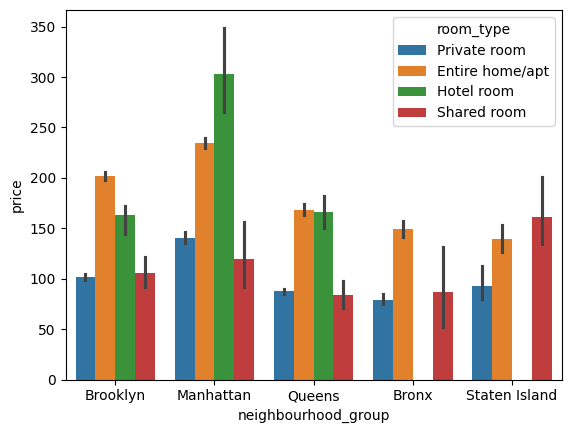

In [ ]:
# lets check how the price is dependent on neighbourhood , 
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')

<Axes: title={'center': 'Locality AND Review Dependcies'}, xlabel='number_of_reviews', ylabel='price'>

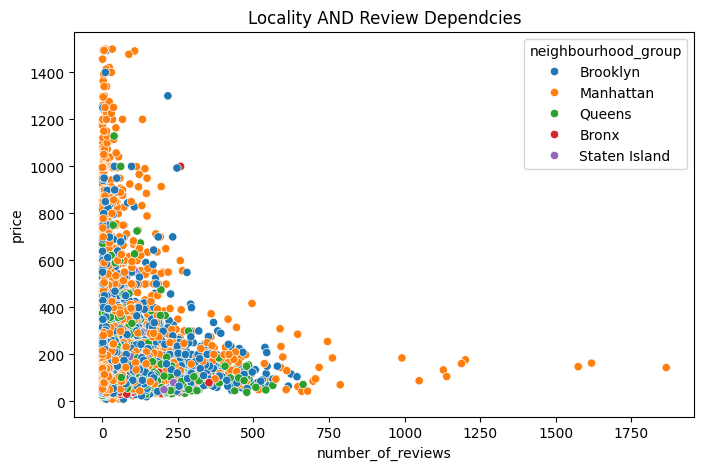

In [ ]:
# number of reveiws and price relationship 
plt.figure(figsize=(8,5))
plt.title("Locality AND Review Dependcies")
sns.scatterplot(data=df,x='number_of_reviews',y='price',hue='neighbourhood_group')

see when the price is low we get more number of reveiws , and when price is high we get less reveiw.
Now lets we make pairplot 

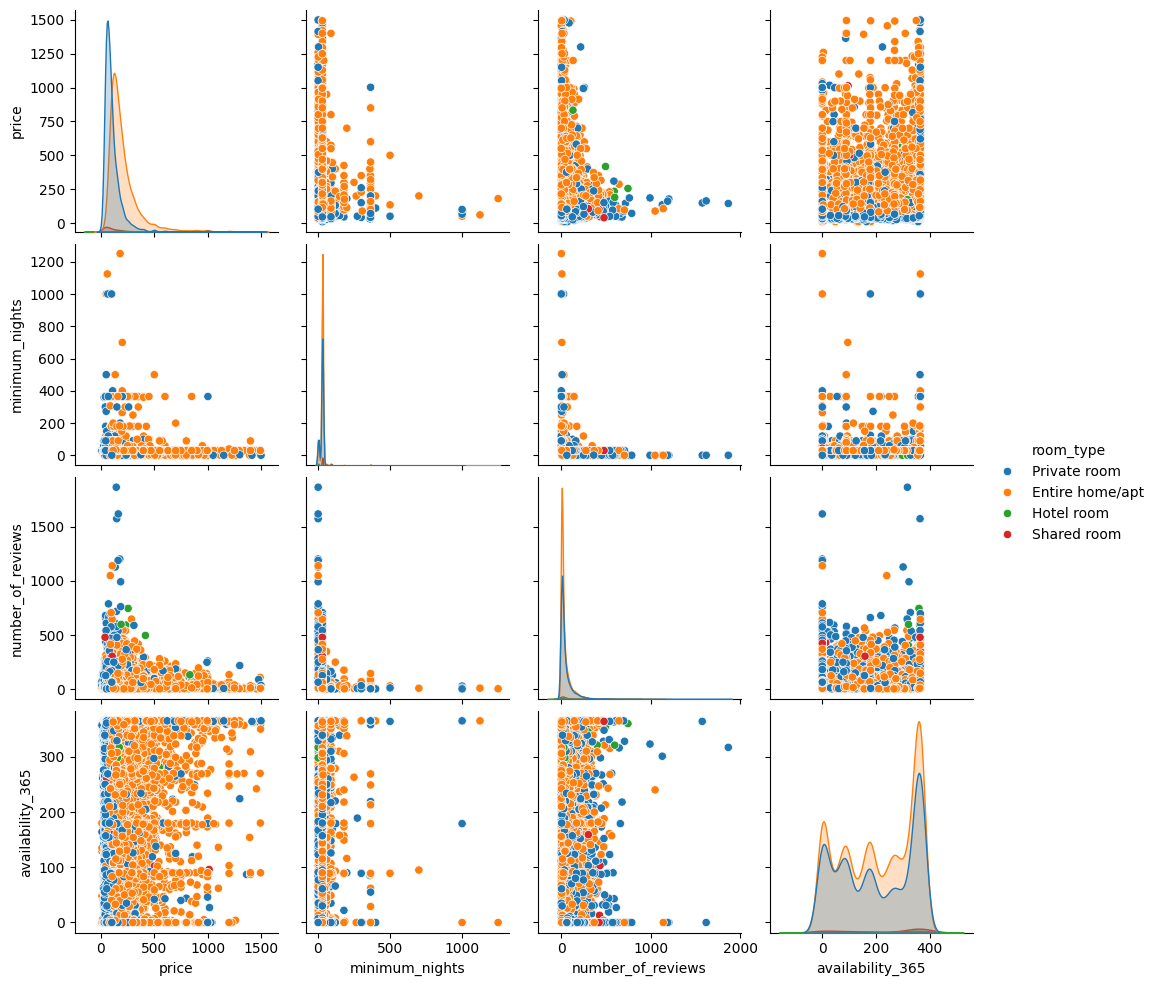

In [ ]:
sns.pairplot(data=df,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')

<Axes: xlabel='longitude', ylabel='latitude'>

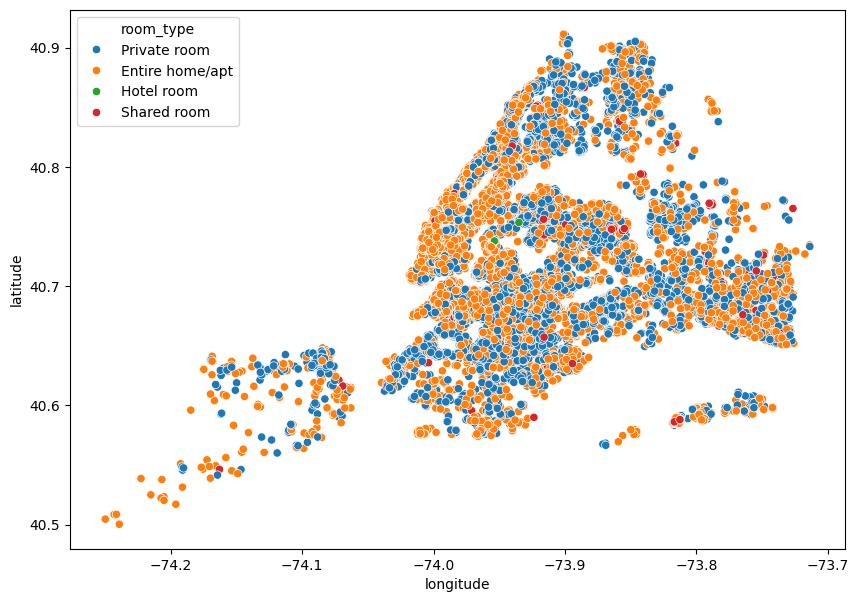

In [ ]:
# Geographical Distribution of Airbnb Listing
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')

In [ ]:
df.dtypes

id                                  Int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price_per_bed                     float64
dtype: object

##### 4️⃣ Advanced Data Analysis
- Enhance your project by answering key business questions:




**✅ 1. Top 10 Hosts by Number of Listings**

C:\Users\RAVI YADAV\AppData\Local\Temp\ipykernel_18216\614237145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="magma")


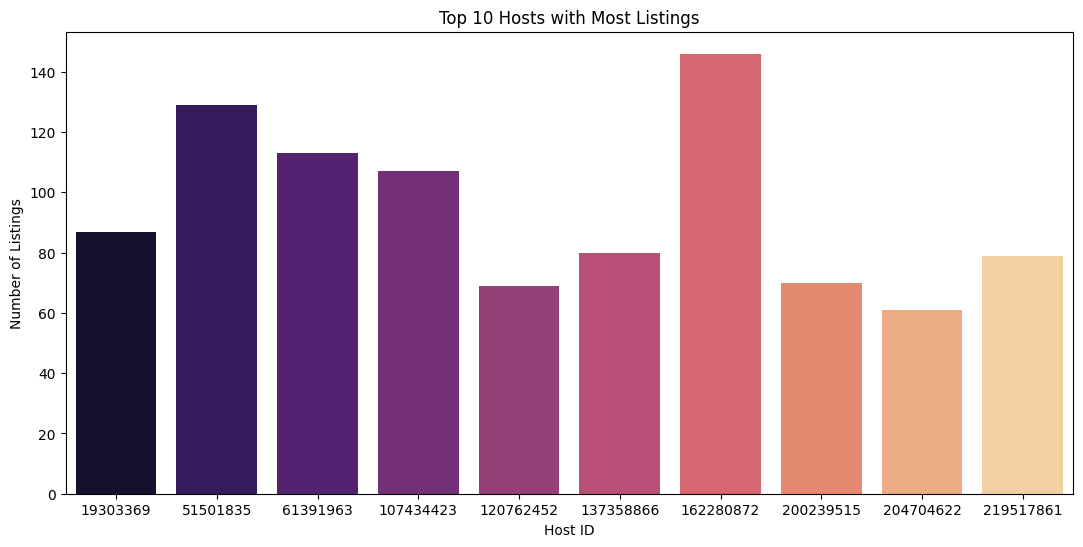

In [ ]:
top_hosts = data['host_id'].value_counts().head(10)
plt.figure(figsize=(13,6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="magma")
plt.title("Top 10 Hosts with Most Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.show()


##### ✅ 2.Geospatial Analysis
- add folium maps showing Airbnb locations

**✅ Airbnb Listings on a Map**

In [ ]:
import folium

# Create a map centered around NYC
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add points to the map
for _, row in data.sample(500).iterrows():  # Sample 500 listings to avoid clutter
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_nyc)

map_nyc
